## Introduction to Image Processing:  
#### Classify handwritten digits using the famous MNIST data

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.  As the competition progresses, we will release tutorials which explain different machine learning algorithms and help you to get started.


The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.


#### Loading packages...  

In [1]:
import os
import sys
import time
import glob
import math
import random
import pickle
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties

#from collections import Counter
#import statsmodels.api as sm
#from zipfile import ZipFile
#import seaborn.apionly as sns

#https://github.com/opencv/opencv
#http://www.pyimagesearch.com/2015/07/20/install-opencv-3-0-and-python-3-4-on-ubuntu/
#import cv2 

#from sklearn.utils import shuffle
#from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm

#import lasagne
#from lasagne.layers import helper
#from lasagne.updates import adam
#from lasagne.nonlinearities import rectify, softmax
#from lasagne.layers import InputLayer, MaxPool2DLayer, DenseLayer, DropoutLayer, helper
#from lasagne.layers import Conv2DLayer as ConvLayer

#import theano
#from theano import tensor as T

import tensorflow as tf

%matplotlib inline
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
datapath = "../datasets/Kaggle/"
outputs = "../outputs/"

In [23]:
# read training data from CSV file 
train_data = pd.read_csv(os.path.join(datapath, "kaggle_digits_train.csv"))

print('data({0[0]},{0[1]})'.format(train_data.shape))
train_data.head()

data(42000,785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Every image is a "stretched" array of pixel values.  
In this case it's 784 pixels => 28 * 28 px  

In [18]:
images = train_data.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

images(42000,784)


In [19]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


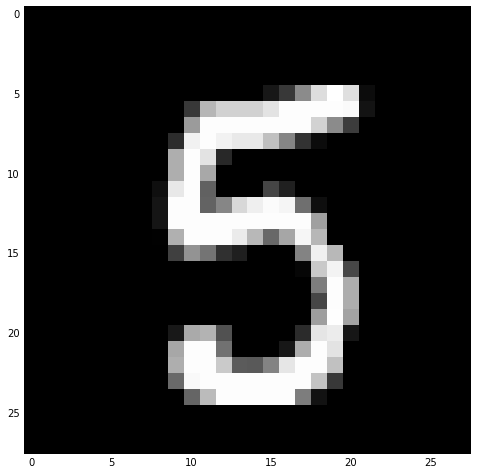

In [20]:
# just to visualize ith test image
# image number to output
IMAGE_TO_DISPLAY = 10

plt.imshow(X_test[IMAGE_TO_DISPLAY].reshape((28, 28)))

In [22]:
labels_flat = train_data[[0]].values.ravel()

print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

labels_flat(42000)
labels_flat[10] => 8


In [24]:
labels_flat

array([1, 0, 1, ..., 7, 6, 9])

In [27]:
labels_count = np.unique(labels_flat).shape[0]

print('labels_count => {0}'.format(labels_count))

labels_count => 10


In [25]:
X_traincv, X_testcv, y_traincv, y_testcv = cross_validation.train_test_split(images, 
                                                                             labels_flat, 
                                                                             test_size=0.4, 
                                                                             random_state=0)

In [26]:
# Train SVM...

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = svm.SVC(kernel='poly',
              C=1.57,
              degree=2, 
              gamma=0.278,
              coef0=0.0, 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, 
              class_weight=None, 
              verbose=False, 
              max_iter=-1, 
              random_state=0).fit(X_traincv, y_traincv)

eval1 = clf.score(X_testcv, y_testcv)
print(eval1)

0.972083333333


In [28]:
print('Predicting...')
predict = clf.predict(X_test)
predict[0:10]

Predicting...


array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])

In [49]:
X_testcv.shape[0]
X_traincv.shape

(25200, 784)

### Using Tensor Flow  
https://www.kaggle.com/kakauandme/digit-recognizer/tensorflow-deep-nn/comments  

In [50]:
# settings
LEARNING_RATE = 1e-4

# set to 20000 on local environment to get 0.99 accuracy
TRAINING_ITERATIONS = 2500        
DROPOUT = 0.5
BATCH_SIZE = 50

# set to 0 to train on all available data
VALIDATION_SIZE = X_testcv.shape[0]

# image number to output
IMAGE_TO_DISPLAY = 10

For most classification problems "one-hot vectors" are used. A one-hot vector is a vector that contains a single element equal to 1 and the rest of the elements equal to 0. In this case, the nth digit is represented as a zero vector with 1 in the nth position.  

In [51]:
# convert class labels from scalars to one-hot vectors
# 0 => [1 0 0 0 0 0 0 0 0 0]
# 1 => [0 1 0 0 0 0 0 0 0 0]
# ...
# 9 => [0 0 0 0 0 0 0 0 0 1]

def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]},{0[1]})'.format(labels.shape))
print ('labels[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels[IMAGE_TO_DISPLAY]))

labels(42000,10)
labels[10] => [0 0 0 0 0 0 0 0 1 0]


#### TensorFlow graph  

TensorFlow does its heavy lifting outside Python. Therefore, instead of running every single operation independently, TensorFlow allows users to build a whole graph of interacting operations and then runs the workflow in a separate process at once.  

Helper functions  

For this NN model, a lot of weights and biases are created. Generally, weights should be initialised with a small amount of noise for symmetry breaking, and to prevent 0 gradients.  

Since we are using ReLU neurones (ones that contain rectifier function f(x)=max(0,x)), it is also good practice to initialise them with a slightly positive initial bias to avoid "dead neurones".  

In [52]:
# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

For this problem we use zero padded convolutions so that the output is the same size as the input. Stride/step in this case is equal to 1.  

In general, convolution layer is used to get the features of the data. In the case of digit recognition - a shape of each digit. It uses learnable kernels/filters each of which corresponds to one particular shape pattern. The number of the filter can differ for other problems.  

In [53]:
# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

Pooling is plain max pooling over 2x2 blocks.  

Pooling is used for downsampling of the data. 2x2 max-pooling splits the image into square 2-pixel blocks and only keeps maximum value for each of those blocks.  

In [54]:
# pooling
# [[0,3],
#  [4,2]] => 4

# [[0,1],
#  [1,1]] => 1

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

The good thing about neural networks that any NN can be used as a layer in a large multilayer NN meaning that output of one can be used as input for another. This sequential approach can create very sophisticated NN with multiple layers. They are also called Deep Neural Networks.  

In this case, we use two convolution layers with pooling in between them, then densely connected layer followed by dropout and lastly readout layer.  

In [55]:
# input & output of NN

# images
x = tf.placeholder('float', shape=[None, image_size])
# labels
y_ = tf.placeholder('float', shape=[None, labels_count])

The first layer is a convolution, followed by max pooling. The convolution computes 32 features for each 5x5 patch. Its weight tensor has a shape of [5, 5, 1, 32]. The first two dimensions are the patch size, the next is the number of input channels (1 means that images are grayscale), and the last is the number of output channels. There is also a bias vector with a component for each output channel.  

To apply the layer, we reshape the input data to a 4d tensor, with the first dimension corresponding to the number of images, second and third - to image width and height, and the final dimension - to the number of colour channels.  

After the convolution, pooling reduces the size of the output from 28x28 to 14x14.  

In [56]:
# first convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# (40000,784) => (40000,28,28,1)
image = tf.reshape(x, [-1,image_width , image_height,1])
#print (image.get_shape()) # =>(40000,28,28,1)


h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
#print (h_conv1.get_shape()) # => (40000, 28, 28, 32)
h_pool1 = max_pool_2x2(h_conv1)
#print (h_pool1.get_shape()) # => (40000, 14, 14, 32)


# Prepare for visualization
# display 32 fetures in 4 by 8 grid
layer1 = tf.reshape(h_conv1, (-1, image_height, image_width, 4 ,8))  

# reorder so the channels are in the first dimension, x and y follow.
layer1 = tf.transpose(layer1, (0, 3, 1, 4,2))

layer1 = tf.reshape(layer1, (-1, image_height*4, image_width*8))

The second layer has 64 features for each 5x5 patch. Its weight tensor has a shape of [5, 5, 32, 64]. The first two dimensions are the patch size, the next is the number of input channels (32 channels correspond to 32 featured that we got from previous convolutional layer), and the last is the number of output channels. There is also a bias vector with a component for each output channel.  

Because the image is down-sampled by pooling to 14x14 size second convolutional layer picks up more general characteristics of the images. Filters cover more space of the picture. Therefore, it is adjusted for more generic features while the first layer finds smaller details.  

In [57]:
# second convolutional layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#print (h_conv2.get_shape()) # => (40000, 14,14, 64)
h_pool2 = max_pool_2x2(h_conv2)
#print (h_pool2.get_shape()) # => (40000, 7, 7, 64)

# Prepare for visualization
# display 64 fetures in 4 by 16 grid
layer2 = tf.reshape(h_conv2, (-1, 14, 14, 4 ,16))  

# reorder so the channels are in the first dimension, x and y follow.
layer2 = tf.transpose(layer2, (0, 3, 1, 4,2))

layer2 = tf.reshape(layer2, (-1, 14*4, 14*16))

Now that the image size is reduced to 7x7, we add a fully-connected layer with 1024 neurones to allow processing on the entire image (each of the neurons of the fully connected layer is connected to all the activations/outpus of the previous layer)

In [58]:
# densely connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

# (40000, 7, 7, 64) => (40000, 3136)
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#print (h_fc1.get_shape()) # => (40000, 1024)

To prevent overfitting, we apply dropout before the readout layer.  

Dropout removes some nodes from the network at each training stage. Each of the nodes is either kept in the network with probability keep_prob or dropped with probability 1 - keep_prob. After the training stage is over the nodes are returned to the NN with their original weights.  

In [59]:
# dropout
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Finally, we add a softmax layer, the same one if we use just a simple softmax regression  
https://en.wikipedia.org/wiki/Softmax_function.  

In [60]:
# readout layer for deep net
W_fc2 = weight_variable([1024, labels_count])
b_fc2 = bias_variable([labels_count])

y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

#print (y.get_shape()) # => (40000, 10)

To evaluate network performance we use cross-entropy and to minimise it ADAM optimiser is used.  

ADAM optimiser is a gradient based optimization algorithm, based on adaptive estimates, it's more sophisticated than steepest gradient descent and is well suited for problems with large data or many parameters.  

In [61]:
# cost function
cross_entropy = -tf.reduce_sum(y_*tf.log(y))


# optimisation function
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

To predict values from test data, highest probability is picked from "one-hot vector" indicating that chances of an image being one of the digits are highest.  

In [62]:
# prediction function
#[0.1, 0.9, 0.2, 0.1, 0.1 0.3, 0.5, 0.1, 0.2, 0.3] => 1
predict = tf.argmax(y,1)

Finally neural network structure is defined and TensorFlow graph is ready for training.

### Train, validate and predict  

#### Helper functions

Ideally, we should use all data for every step of the training, but that's expensive. So, instead, we use small "batches" of random data.  

This method is called stochastic training. It is cheaper, faster and gives much of the same result.  

In [63]:
epochs_completed = 0
index_in_epoch = 0
num_examples = X_traincv.shape[0]

# serve data by batches
def next_batch(batch_size):
    
    global X_traincv
    global y_traincv
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        X_traincv = X_traincv[perm]
        y_traincv = y_traincv[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return X_traincv[start:end], y_traincv[start:end]

Now when all operations for every variable are defined in TensorFlow graph all computations will be performed outside Python environment.  

In [64]:
# start TensorFlow session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f69ca0e90f0>>
Traceback (most recent call last):
  File "/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 171, in __del__
    self.close()
  File "/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 976, in close
    self._default_session.__exit__(None, None, None)
  File "/usr/lib/python3.5/contextlib.py", line 66, in __exit__
    next(self.gen)
  File "/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3378, in get_controller
    % type(default))
AssertionError: Nesting violated for default stack of <class 'weakref'> objects


Each step of the loop, we get a "batch" of data points from the training set and feed it to the graph to replace the placeholders. In this case, it's: x, y and dropout.  

Also, once in a while, we check training accuracy on an upcoming "batch".  

On the local environment, we recommend saving training progress, so it can be recovered for further training, debugging or evaluation.  

In [65]:
# visualisation variables
train_accuracies = []
validation_accuracies = []
x_range = []
display_step=1

for i in range(TRAINING_ITERATIONS):
    #get new batch
    batch_xs, batch_ys = next_batch(BATCH_SIZE)        
    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i%display_step == 0 or (i+1) == TRAINING_ITERATIONS:
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs, 
                                                  y_: batch_ys, 
                                                  keep_prob: 1.0})       
        if(VALIDATION_SIZE):
            validation_accuracy = accuracy.eval(feed_dict={x: X_testcv[0:BATCH_SIZE],
                                                           y_: y_testcv[0:BATCH_SIZE],
                                                           keep_prob: 1.0})                                  
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, 
                                                                                        validation_accuracy, 
                                                                                        i))
            validation_accuracies.append(validation_accuracy)
        else:
             print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        # increase display_step
        if i%(display_step*10) == 0 and i:
            display_step *= 10
    # train on batch
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: DROPOUT})

ValueError: Cannot feed value of shape (50,) for Tensor 'Placeholder_4:0', which has shape '(?, 10)'

After training is done, it's good to check accuracy on data that wasn't used in training.

In [ ]:
# check final accuracy on validation set  
if(VALIDATION_SIZE):
    validation_accuracy = accuracy.eval(feed_dict={x: validation_images, 
                                                   y_: validation_labels, 
                                                   keep_prob: 1.0})
    print('validation_accuracy => %.4f'%validation_accuracy)
    plt.plot(x_range, train_accuracies,'-b', label='Training')
    plt.plot(x_range, validation_accuracies,'-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.7)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.show()

When, we're happy with the outcome, we read test data from test.csv and predict labels for provided images.  

Test data contains only images and labels are missing. Otherwise, the structure is similar to training data.  

Predicted labels are stored into CSV file for future submission.  

In [ ]:
# read test data from CSV file 
test_images = pd.read_csv('../input/test.csv').values
test_images = test_images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
test_images = np.multiply(test_images, 1.0 / 255.0)

print('test_images({0[0]},{0[1]})'.format(test_images.shape))


# predict test set
#predicted_lables = predict.eval(feed_dict={x: test_images, keep_prob: 1.0})

# using batches is more resource efficient
predicted_lables = np.zeros(test_images.shape[0])
for i in range(0,test_images.shape[0]//BATCH_SIZE):
    predicted_lables[i*BATCH_SIZE : (i+1)*BATCH_SIZE] = predict.eval(feed_dict={x: test_images[i*BATCH_SIZE : (i+1)*BATCH_SIZE], 
                                                                                keep_prob: 1.0})


print('predicted_lables({0})'.format(len(predicted_lables)))

# output test image and prediction
display(test_images[IMAGE_TO_DISPLAY])
print ('predicted_lables[{0}] => {1}'.format(IMAGE_TO_DISPLAY,predicted_lables[IMAGE_TO_DISPLAY]))

# save results
np.savetxt('submission_softmax.csv', 
           np.c_[range(1,len(test_images)+1),predicted_lables], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

#### Appendix

As it was mentioned before, it is good to output some variables for a better understanding of the process.  

Here we pull an output of the first convolution layer from TensorFlow graph. 32 features are transformed into an image grid, and it's quite interesting to see how filters picked by NN outline characteristics of different digits.  

In [ ]:
layer1_grid = layer1.eval(feed_dict={x: test_images[IMAGE_TO_DISPLAY:IMAGE_TO_DISPLAY+1], keep_prob: 1.0})
plt.axis('off')
plt.imshow(layer1_grid[0], cmap=cm.seismic )

In [ ]:
sess.close()

Reference:  

Deep MNIST for Experts  
https://www.tensorflow.org/versions/master/tutorials/mnist/pros/index.html#deep-mnist-for-experts  
A Convolutional Network implementation example using TensorFlow library  
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3%20-%20Neural%20Networks/convolutional_network.ipynb  
Digit recognizer in Python using CNN  
https://www.kaggle.com/kobakhit/digit-recognizer/digit-recognizer-in-python-using-cnn  
Deep Learning in a Nutshell: Core Concepts  
http://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/  